<a href="https://colab.research.google.com/github/Vinaypatil-Ev/vinEvPy-GoCoLab/blob/main/Tensorflow/TensorflowPrac14_training_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
def get_model():
  inputs = tf.keras.Input((784, ), name="funcmodel")
  x = tf.keras.layers.Dense(64, activation="relu")(inputs)
  x = tf.keras.layers.Dense(64, activation="relu")(x)
  outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
  model = tf.keras.Model(inputs, outputs)
  return model

In [ ]:
model = get_model()

In [ ]:
(xtrn, ytrn), (xtst, ytst) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


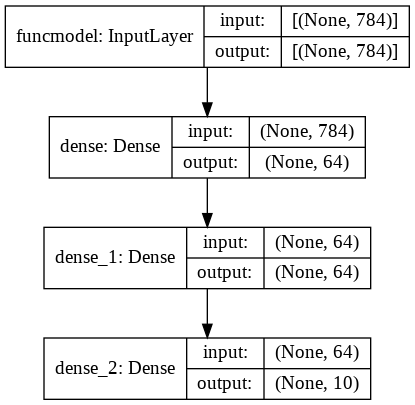

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
xtrn = xtrn.reshape(len(xtrn), 784).astype("float32") / 255.0
xtst = xtst.reshape(len(xtst), 784).astype("float32") / 255.0

In [ ]:
ytrn = ytrn.astype("float32")
ytst = ytst.astype("float32")

In [ ]:
xtrn.shape

(60000, 784)

In [ ]:
xtst.shape

(10000, 784)

In [ ]:
ytrn.shape

(60000,)

In [ ]:
ytst.shape

(10000,)

In [ ]:
xtrn[-10000:].shape

(10000, 784)

In [ ]:
ytrn[-10000:].shape

(10000,)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
def get_compiled_model():
  model = get_model()
  model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
  return model

In [ ]:
ytrn[:10]

array([5., 0., 4., 1., 9., 2., 1., 3., 1., 4.], dtype=float32)

In [ ]:
history = model.fit(
    xtrn[:-10000],
    ytrn[:-10000],
    batch_size=64,
    epochs=2,
    validation_data=(xtrn[-10000:], ytrn[-10000:])
)

Epoch 1/2
782/782 [==============================] - 3s 3ms/step - loss: 0.5760 - sparse_categorical_accuracy: 0.8344 - val_loss: 0.1791 - val_sparse_categorical_accuracy: 0.9499
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.1788 - sparse_categorical_accuracy: 0.9468 - val_loss: 0.1279 - val_sparse_categorical_accuracy: 0.9625


In [ ]:
history.history

{'loss': [0.3458961844444275, 0.163845494389534],
 'sparse_categorical_accuracy': [0.8999000191688538, 0.951259970664978],
 'val_loss': [0.17906546592712402, 0.12786613404750824],
 'val_sparse_categorical_accuracy': [0.9498999714851379, 0.9624999761581421]}

In [ ]:
# Evaluate the model on test data

result = model.evaluate(xtst, ytst, batch_size=64)

result

157/157 [==============================] - 0s 1ms/step - loss: 0.1288 - sparse_categorical_accuracy: 0.9596


[0.12875713407993317, 0.9595999717712402]

In [ ]:

ytrn[0]

5.0

In [ ]:
model.predict(xtrn[:1])

array([[4.5776611e-07, 3.0865993e-07, 1.3306993e-06, 1.5007692e-02,
        2.7880032e-10, 9.8492384e-01, 2.9231080e-09, 6.8000026e-07,
        3.2462908e-06, 6.2485306e-05]], dtype=float32)

In [ ]:
model.predict(xtrn[:1]).argmax()

5

In [ ]:
model.predict(xtrn[:1]).max()

0.98492384

# Compile
##loss
##optimizer

## customize loss

In [ ]:
def get_mse(ytrue, ypred):
  return tf.math.reduce_mean(tf.square(ytrue - ypred))

In [ ]:
model = get_model()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=get_mse)
model.fit(xtrn, tf.one_hot(ytrn, depth=10), batch_size=64, epochs=1)

938/938 [==============================] - 6s 6ms/step - loss: 0.0259


In [ ]:
class CustomMse(tf.keras.losses.Loss):
  def __init__(self, regulariztion_factor=0.1, name="custom_mse"):
    super().__init__(name=name)
    self.regulariztion_factor = regulariztion_factor

  def call(self, ytrue, ypred):
    mse = tf.math.reduce_mean(tf.square(ytrue - ypred))
    print("in call")
    reg = tf.math.reduce_mean(tf.square(0.5 - ypred))
    return mse + reg * self.regulariztion_factor

In [ ]:
model = get_model()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=CustomMse())
model.fit(xtrn, tf.one_hot(ytrn, depth=10), batch_size=64, epochs=1)

in call
in call
938/938 [==============================] - 5s 5ms/step - loss: 0.0468


evaluate model using tf.data.Dataset

In [ ]:
trn_data = tf.data.Dataset.from_tensor_slices((xtrn, ytrn))

In [ ]:
trn_data = trn_data.shuffle(1024).batch(64)

In [ ]:
tst_data = tf.data.Dataset.from_tensor_slices((xtst, ytst))
tst_data = tst_data.batch(64)

In [ ]:
model = get_compiled_model()

In [ ]:
model.fit(trn_data)

938/938 [==============================] - 4s 3ms/step - loss: 0.5186 - sparse_categorical_accuracy: 0.8539


In [ ]:
result = model.evaluate(tst_data)

157/157 [==============================] - 0s 1ms/step - loss: 0.1740 - sparse_categorical_accuracy: 0.9477


In [ ]:
dict(zip(model.metrics_names, result))

{'loss': 0.17403529584407806, 'sparse_categorical_accuracy': 0.947700023651123}

In [ ]:
64*157

10048